In [16]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [17]:
df= pd.read_csv('wine_test.csv')

In [18]:
df

,Unnamed: 0,alcohol,malic_acid,ash,alcalinity_of_ash,magnesium,total_phenols,flavanoids,nonflavanoid_phenols,proanthocyanins,color_intensity,hue,od280/od315_of_diluted_wines,proline,class
0,0,14.23,1.71,2.43,15.6,127,2.80,3.06,0.28,2.29,5.64,1.04,3.92,1065,0
1,1,NaN,1.78,2.14,11.2,100,2.65,2.76,0.26,1.28,4.38,1.05,3.40,1050,0
2,2,13.16,2.36,2.67,18.6,101,2.80,3.24,0.30,2.81,5.68,1.03,3.17,1185,0
3,3,14.37,1.95,2.50,16.8,113,3.85,3.49,0.24,2.18,7.80,0.86,3.45,1480,0
4,4,13.24,2.59,2.87,21.0,118,2.80,2.69,0.39,1.82,4.32,1.04,2.93,735,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
173,173,13.71,5.65,2.45,20.5,95,1.68,0.61,0.52,1.06,7.70,0.64,1.74,740,2
174,174,13.40,3.91,2.48,23.0,102,1.80,0.75,0.43,1.41,7.30,0.70,1.56,750,2
175,175,13.27,4.28,2.26,20.0,120,1.59,0.69,0.43,1.35,10.20,0.59,1.56,835,2
176,176,13.17,2.59,2.37,20.0,120,1.65,0.68,0.53,1.46,9.30,0.60,1.62,840,2


In [19]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 178 entries, 0 to 177
Data columns (total 15 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   Unnamed: 0                    178 non-null    int64  
 1   alcohol                       176 non-null    float64
 2   malic_acid                    178 non-null    float64
 3   ash                           178 non-null    float64
 4   alcalinity_of_ash             178 non-null    float64
 5   magnesium                     178 non-null    int64  
 6   total_phenols                 178 non-null    float64
 7   flavanoids                    178 non-null    float64
 8   nonflavanoid_phenols          173 non-null    float64
 9   proanthocyanins               178 non-null    float64
 10  color_intensity               178 non-null    float64
 11  hue                           178 non-null    float64
 12  od280/od315_of_diluted_wines  178 non-null    float64
 13  proli

- 분류를 이용한 예측을 진행해야 한다.
- 타겟을 제외한 피처들은 수치형 데이터
- 수치형데이터구나? - 요약통계도 볼 필요가 있고, 수치형 데이터의 분포는 어떤가?
- 정규분포의 형태인가?
---

- 타겟 내가 예측할 것은 분포가 어떻게 되어있나?
- 정답에 대한 비중에 따라서 학습할 때 가중치를 줘야한다.
- 흔히 말하는 오버샘플링(낮은 비율 클래스의 데이터 수를 늘림으로써 데이터 불균형을 해소하는 아이디어) 등은 데이터의 불균형을 해소하기 위해서 하는 방법
- 정답이 불균형인 경우는 문제가 될 수 있다.

In [20]:
df['class'].value_counts()

1    71
0    59
2    48
Name: class, dtype: int64

<Axes: ylabel='class'>

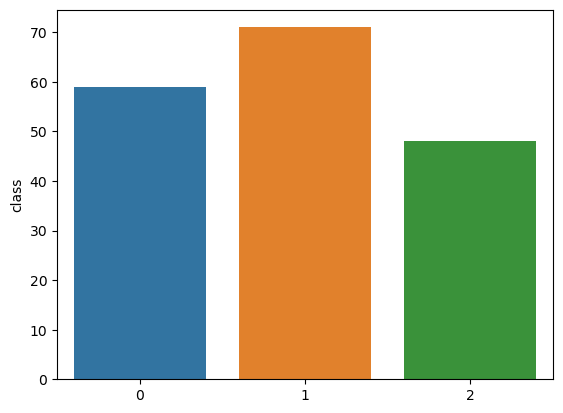

In [21]:
sns.barplot(x=df['class'].value_counts().index, y=df['class'].value_counts())

- 정답레이블이 너무 불균형은 아니지만, 분석하기전 항상 모든 피처의 분포나 통계치는 필수적으로 봐야된다.

- 통계치 요약

In [22]:
df.describe()

,Unnamed: 0,alcohol,malic_acid,ash,alcalinity_of_ash,magnesium,total_phenols,flavanoids,nonflavanoid_phenols,proanthocyanins,color_intensity,hue,od280/od315_of_diluted_wines,proline,class
count,178.000000,176.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,173.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000
mean,88.500000,12.989091,2.336348,2.366517,19.494944,99.741573,2.295112,2.029270,0.362370,1.590899,5.058090,0.957449,2.611685,746.893258,0.938202
std,51.528309,0.804431,1.117146,0.274344,3.339564,14.282484,0.625851,0.998859,0.126153,0.572359,2.318286,0.228572,0.709990,314.907474,0.775035
min,0.000000,11.030000,0.740000,1.360000,10.600000,70.000000,0.980000,0.340000,0.130000,0.410000,1.280000,0.480000,1.270000,278.000000,0.000000
25%,44.250000,12.355000,1.602500,2.210000,17.200000,88.000000,1.742500,1.205000,0.260000,1.250000,3.220000,0.782500,1.937500,500.500000,0.000000
50%,88.500000,13.050000,1.865000,2.360000,19.500000,98.000000,2.355000,2.135000,0.340000,1.555000,4.690000,0.965000,2.780000,673.500000,1.000000
75%,132.750000,13.672500,3.082500,2.557500,21.500000,107.000000,2.800000,2.875000,0.450000,1.950000,6.200000,1.120000,3.170000,985.000000,2.000000
max,177.000000,14.750000,5.800000,3.230000,30.000000,162.000000,3.880000,5.080000,0.660000,3.580000,13.000000,1.710000,4.000000,1680.000000,2.000000


<Axes: >

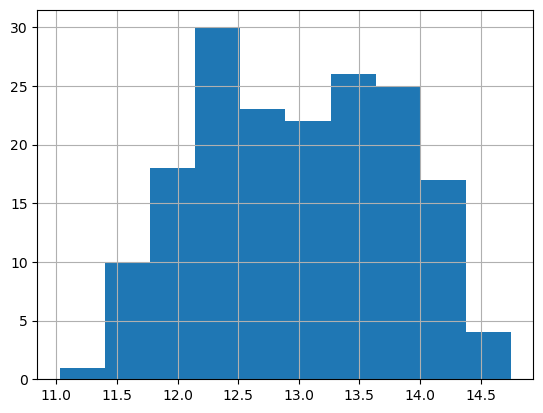

In [23]:
df['alcohol'].hist()

<Axes: >

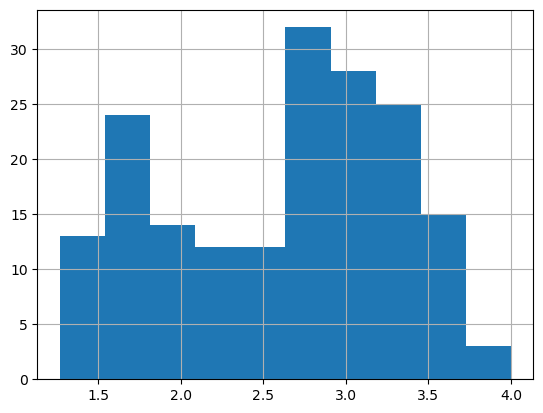

In [24]:
df['od280/od315_of_diluted_wines'].hist()

<Axes: >

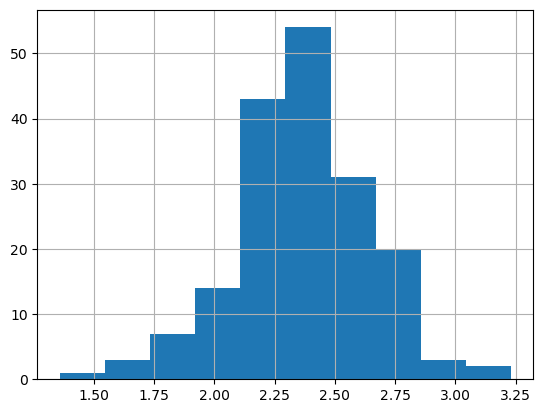

In [25]:
df['ash'].hist()

- 결측치

In [26]:
df.isna().sum()

Unnamed: 0                      0
alcohol                         2
malic_acid                      0
ash                             0
alcalinity_of_ash               0
magnesium                       0
total_phenols                   0
flavanoids                      0
nonflavanoid_phenols            5
proanthocyanins                 0
color_intensity                 0
hue                             0
od280/od315_of_diluted_wines    0
proline                         0
class                           0
dtype: int64

In [27]:
df.isna().mean()

Unnamed: 0                      0.000000
alcohol                         0.011236
malic_acid                      0.000000
ash                             0.000000
alcalinity_of_ash               0.000000
magnesium                       0.000000
total_phenols                   0.000000
flavanoids                      0.000000
nonflavanoid_phenols            0.028090
proanthocyanins                 0.000000
color_intensity                 0.000000
hue                             0.000000
od280/od315_of_diluted_wines    0.000000
proline                         0.000000
class                           0.000000
dtype: float64

- 결측치의 경우는 drop, 대체하거나 둘 중 하나일 것

- 지금의 경우는 결측치가 상당히 작다 그렇기 때문에 drop

- 만약 결측치가 많은 경우? 70%이상 결측치다? 80~90% 결측치면 날려야하는데
- 만약 꼭 이 피처를 사용해야 하는 경우는 도메인을 통해 결측을 채우거나, 통계적인 방법, 다양한 기술적인 방법으로 결측치를 채워야 한다.
- 50%정도면 대부분 피처를 살려서 사용하려고 한다.

- 하지만 예외적인 결측치가 많은 경우는 단순하게 드랍이 아니라 고민을 해서 분석가 판단해야 한다.

In [28]:
## 결측치를 drop할 수도 있고, 중위값으로 결측치를 채우자
df['alcohol'].fillna(df['alcohol'].median(), inplace=True) # 중위값
df['nonflavanoid_phenols'].fillna(df['nonflavanoid_phenols'].mean(), inplace=True) # 평균

In [29]:
df['alcohol'].mean()

12.989775280898877

In [30]:
df['alcohol']

0      14.23
1      13.05
2      13.16
3      14.37
4      13.24
       ...  
173    13.71
174    13.40
175    13.27
176    13.17
177    14.13
Name: alcohol, Length: 178, dtype: float64

- 단순하게 mean, max로 채우면 안 되고, 실제 결측치를 볼 때는 정답값에 따른 평균을 채우거나 
- 결측치도 타겟 레이블 -> 0이 타겟이 있는데 평균을 하면 바이어스가 낀다.
- 정답레이블을 기준으로 값을 다시 한 번 체크해서 결측치를 채운다 -> 같은 레이블끼리의 분포로 값을 채운다.

In [31]:
df.columns

Index(['Unnamed: 0', 'alcohol', 'malic_acid', 'ash', 'alcalinity_of_ash',
       'magnesium', 'total_phenols', 'flavanoids', 'nonflavanoid_phenols',
       'proanthocyanins', 'color_intensity', 'hue',
       'od280/od315_of_diluted_wines', 'proline', 'class'],
      dtype='object')

In [32]:
df

,Unnamed: 0,alcohol,malic_acid,ash,alcalinity_of_ash,magnesium,total_phenols,flavanoids,nonflavanoid_phenols,proanthocyanins,color_intensity,hue,od280/od315_of_diluted_wines,proline,class
0,0,14.23,1.71,2.43,15.6,127,2.80,3.06,0.28,2.29,5.64,1.04,3.92,1065,0
1,1,13.05,1.78,2.14,11.2,100,2.65,2.76,0.26,1.28,4.38,1.05,3.40,1050,0
2,2,13.16,2.36,2.67,18.6,101,2.80,3.24,0.30,2.81,5.68,1.03,3.17,1185,0
3,3,14.37,1.95,2.50,16.8,113,3.85,3.49,0.24,2.18,7.80,0.86,3.45,1480,0
4,4,13.24,2.59,2.87,21.0,118,2.80,2.69,0.39,1.82,4.32,1.04,2.93,735,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
173,173,13.71,5.65,2.45,20.5,95,1.68,0.61,0.52,1.06,7.70,0.64,1.74,740,2
174,174,13.40,3.91,2.48,23.0,102,1.80,0.75,0.43,1.41,7.30,0.70,1.56,750,2
175,175,13.27,4.28,2.26,20.0,120,1.59,0.69,0.43,1.35,10.20,0.59,1.56,835,2
176,176,13.17,2.59,2.37,20.0,120,1.65,0.68,0.53,1.46,9.30,0.60,1.62,840,2


In [33]:
df_n = df[['alcohol', 'malic_acid', 'ash', 'alcalinity_of_ash',
       'magnesium', 'total_phenols', 'flavanoids', 'nonflavanoid_phenols',
       'proanthocyanins', 'color_intensity', 'hue',
       'od280/od315_of_diluted_wines', 'proline', 'class']]

In [34]:
df_n

,alcohol,malic_acid,ash,alcalinity_of_ash,magnesium,total_phenols,flavanoids,nonflavanoid_phenols,proanthocyanins,color_intensity,hue,od280/od315_of_diluted_wines,proline,class
0,14.23,1.71,2.43,15.6,127,2.80,3.06,0.28,2.29,5.64,1.04,3.92,1065,0
1,13.05,1.78,2.14,11.2,100,2.65,2.76,0.26,1.28,4.38,1.05,3.40,1050,0
2,13.16,2.36,2.67,18.6,101,2.80,3.24,0.30,2.81,5.68,1.03,3.17,1185,0
3,14.37,1.95,2.50,16.8,113,3.85,3.49,0.24,2.18,7.80,0.86,3.45,1480,0
4,13.24,2.59,2.87,21.0,118,2.80,2.69,0.39,1.82,4.32,1.04,2.93,735,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
173,13.71,5.65,2.45,20.5,95,1.68,0.61,0.52,1.06,7.70,0.64,1.74,740,2
174,13.40,3.91,2.48,23.0,102,1.80,0.75,0.43,1.41,7.30,0.70,1.56,750,2
175,13.27,4.28,2.26,20.0,120,1.59,0.69,0.43,1.35,10.20,0.59,1.56,835,2
176,13.17,2.59,2.37,20.0,120,1.65,0.68,0.53,1.46,9.30,0.60,1.62,840,2


- 스케일링 종류들
- standard - 표준정규분포 z 스코어
- minmax - 최댓값, 최솟값으로 스케일링
- absmax - 절댓값으로
- robust - 4분위수 range
- nomalizer - 전체 행 기준 스케일링
- 기타 빈도 스케일링 있고 등등

In [35]:
from sklearn.preprocessing import StandardScaler, MinMaxScaler, RobustScaler

- 스케일링에서 중요한 것은 어떤 스케일링 기법을 사용해야 하는가?
- 기본적으로 스케일링 공식에 들어가는 내용들 파악해야 한다.
- standrad -> 평균과 분산 ## 이상치에 영향을 받는다.
- minmax -> 최대,최소 ## 이상치에 영향을 많이 받는다.
- Robust -> 1사분위수 2사분위수 -> 분포 ##이상치에 덜  받는다 IQR -> 이상치 통계적인 방법 

- 이상치에 민감하다는 건 -> 이상치가 존재하는 여부를 확인-> 이상치가 의미는 값인가?
- 단순하게 이상치라고해서 제거하는 것이 아니라 이상치가 중요한 값일 수 있다.
- 성적인데 모든 성적이 올 100점
- 고객입장으로 주문을 하루에 500만 원 평균 하루 주문치가 10만 원 (이상치 제외하면)

- 이상치 민감하게 안 받으려면 Robust로만 다 써 단순하게 접근할 건 아니다.
- 정규분포화를 만드려고 하는 것 
- 로그스케일링도 있다. 왼쪽으로 치우친 분포의 경우는 로그스케일링

In [36]:
#먼저 예시로 스케일링이 어떤 식으로 되는지?
st_scaler = StandardScaler()
mm_scaler = MinMaxScaler()

In [37]:
df_m=np.array(df['magnesium'])

- 2차원 np로 만들고

In [38]:
df_m

array([127, 100, 101, 113, 118, 112,  96, 121,  97,  98, 105,  95,  89,
        91, 102, 112, 120, 115, 108, 116, 126, 102, 101,  95,  96, 124,
        93,  94, 107,  96, 101, 106, 104, 132, 110, 100, 110,  98,  98,
       128, 117,  90, 101, 103, 107, 111, 102, 101, 103, 108,  92,  94,
       111, 115, 118, 116, 118, 102, 108,  88, 101, 100,  94,  87, 104,
        98,  78,  78, 110, 151, 103,  86,  87, 139, 101,  97,  86, 112,
       136, 101,  86,  86,  78,  85,  94,  99,  90,  88,  84,  70,  81,
        86,  80,  88,  98, 162, 134,  85,  88,  88,  97,  88,  98,  86,
        85,  90,  80,  84,  92,  94, 107,  88, 103,  88,  84,  85,  86,
       108,  80,  87,  96, 119, 102,  86,  82,  85,  86,  92,  88,  80,
       122, 104,  98, 106,  85,  94,  89,  96,  88, 101,  96,  89,  97,
        92, 112, 102,  80,  86,  92, 113, 123, 112, 116,  98, 103,  93,
        89,  97,  98,  89,  88, 107, 106, 106,  90,  88, 111,  88, 105,
       112,  96,  86,  91,  95, 102, 120, 120,  96], dtype=int64

In [39]:
df_m=df_m.reshape(-1,1)

In [40]:
df_m

array([[127],
       [100],
       [101],
       [113],
       [118],
       [112],
       [ 96],
       [121],
       [ 97],
       [ 98],
       [105],
       [ 95],
       [ 89],
       [ 91],
       [102],
       [112],
       [120],
       [115],
       [108],
       [116],
       [126],
       [102],
       [101],
       [ 95],
       [ 96],
       [124],
       [ 93],
       [ 94],
       [107],
       [ 96],
       [101],
       [106],
       [104],
       [132],
       [110],
       [100],
       [110],
       [ 98],
       [ 98],
       [128],
       [117],
       [ 90],
       [101],
       [103],
       [107],
       [111],
       [102],
       [101],
       [103],
       [108],
       [ 92],
       [ 94],
       [111],
       [115],
       [118],
       [116],
       [118],
       [102],
       [108],
       [ 88],
       [101],
       [100],
       [ 94],
       [ 87],
       [104],
       [ 98],
       [ 78],
       [ 78],
       [110],
       [151],
       [103],
      

In [41]:
st_scaler.fit(df_m) #fit함수를 넣어서 진행
mm_scaler.fit(df_m)

MinMaxScaler()

In [42]:
df_m_sc= st_scaler.transform(df_m)
df_m_mm= mm_scaler.transform(df_m)

In [43]:
df_m_sc

array([[ 1.91390522],
       [ 0.01814502],
       [ 0.08835836],
       [ 0.93091845],
       [ 1.28198515],
       [ 0.86070511],
       [-0.26270834],
       [ 1.49262517],
       [-0.192495  ],
       [-0.12228166],
       [ 0.36921172],
       [-0.33292168],
       [-0.75420173],
       [-0.61377505],
       [ 0.1585717 ],
       [ 0.86070511],
       [ 1.42241183],
       [ 1.07134513],
       [ 0.57985175],
       [ 1.14155847],
       [ 1.84369188],
       [ 0.1585717 ],
       [ 0.08835836],
       [-0.33292168],
       [-0.26270834],
       [ 1.7032652 ],
       [-0.47334836],
       [-0.40313502],
       [ 0.50963841],
       [-0.26270834],
       [ 0.08835836],
       [ 0.43942506],
       [ 0.29899838],
       [ 2.26497192],
       [ 0.72027843],
       [ 0.01814502],
       [ 0.72027843],
       [-0.12228166],
       [-0.12228166],
       [ 1.98411856],
       [ 1.21177181],
       [-0.68398839],
       [ 0.08835836],
       [ 0.22878504],
       [ 0.50963841],
       [ 0

In [44]:
df_m_mm

array([[0.61956522],
       [0.32608696],
       [0.33695652],
       [0.4673913 ],
       [0.52173913],
       [0.45652174],
       [0.2826087 ],
       [0.55434783],
       [0.29347826],
       [0.30434783],
       [0.38043478],
       [0.27173913],
       [0.20652174],
       [0.22826087],
       [0.34782609],
       [0.45652174],
       [0.54347826],
       [0.48913043],
       [0.41304348],
       [0.5       ],
       [0.60869565],
       [0.34782609],
       [0.33695652],
       [0.27173913],
       [0.2826087 ],
       [0.58695652],
       [0.25      ],
       [0.26086957],
       [0.40217391],
       [0.2826087 ],
       [0.33695652],
       [0.39130435],
       [0.36956522],
       [0.67391304],
       [0.43478261],
       [0.32608696],
       [0.43478261],
       [0.30434783],
       [0.30434783],
       [0.63043478],
       [0.51086957],
       [0.2173913 ],
       [0.33695652],
       [0.35869565],
       [0.40217391],
       [0.44565217],
       [0.34782609],
       [0.336

<Axes: >

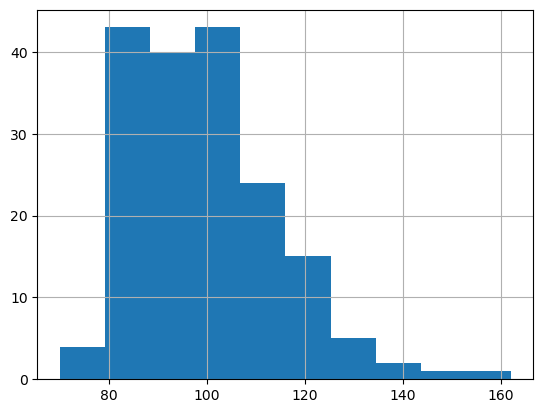

In [45]:
df['magnesium'].hist()

- 스케일링에 대한 더 좋은 값을 찾기 위해서는 예측의 평가지표로 확인한다.
- 머신러닝은 결국 정답레이블에 대한 예측을 평가하니깐

### 데이터를 나눠야 한다!
- sklearn train, test로 나누기
- 스케일링을 진행할 때 train,test로 나눠서 진행한다.

In [50]:
from sklearn.model_selection import train_test_split

# 4가지를 train, test
# 정답데이터 제외한 피처와 정답데이터 이렇게 한쌍이 총 2개 나온다.
# train하고 test 진행

x_train, x_test, y_train, y_test = train_test_split(df_n.drop('class',axis=1), df_n['class'],
                                                   test_size=0.3, random_state=111)

In [52]:
x_train

,alcohol,malic_acid,ash,alcalinity_of_ash,magnesium,total_phenols,flavanoids,nonflavanoid_phenols,proanthocyanins,color_intensity,hue,od280/od315_of_diluted_wines,proline
85,12.67,0.98,2.24,18.0,99,2.20,1.94,0.30,1.46,2.62,1.23,3.16,450
47,13.90,1.68,2.12,16.0,101,3.10,3.39,0.21,2.14,6.10,0.91,3.33,985
18,14.19,1.59,2.48,16.5,108,3.30,3.93,0.32,1.86,8.70,1.23,2.82,1680
0,14.23,1.71,2.43,15.6,127,2.80,3.06,0.28,2.29,5.64,1.04,3.92,1065
65,12.37,1.21,2.56,18.1,98,2.42,2.65,0.37,2.08,4.60,1.19,2.30,678
...,...,...,...,...,...,...,...,...,...,...,...,...,...
169,13.40,4.60,2.86,25.0,112,1.98,0.96,0.27,1.11,8.50,0.67,1.92,630
19,13.64,3.10,2.56,15.2,116,2.70,3.03,0.17,1.66,5.10,0.96,3.36,845
86,12.16,1.61,2.31,22.8,90,1.78,1.69,0.43,1.56,2.45,1.33,2.26,495
108,12.22,1.29,1.94,19.0,92,2.36,2.04,0.39,2.08,2.70,0.86,3.02,312


In [53]:
y_train

85     1
47     0
18     0
0      0
65     1
      ..
169    2
19     0
86     1
108    1
84     1
Name: class, Length: 124, dtype: int64

### 스케일링을 진행
- 데이터를 나누기 전에 어떤 식으로 스케일링을 할지 다 판단하고
- 마지막에 train/test를 나누면서 스케일링 진행

In [54]:
st_scaler= StandardScaler()
st_scaler.fit(x_train)
x_train_st_scaler = st_scaler.transform(x_train)

In [59]:
x_train_st_scaler

array([[-0.43530157, -1.18448679, -0.43569326, ...,  1.23539226,
         0.84482654, -0.97048643],
       [ 1.14734909, -0.54154105, -0.88747834, ..., -0.20876178,
         1.09537442,  0.70060319],
       [ 1.52049437, -0.6242055 ,  0.46787688, ...,  1.23539226,
         0.34373078,  2.87145794],
       ...,
       [-1.09152258, -0.60583562, -0.17215197, ...,  1.6866904 ,
        -0.48160342, -0.82992749],
       [-1.0143201 , -0.89975368, -1.56515594, ..., -0.43441085,
         0.63849299, -1.40153385],
       [-1.50326909, -1.26715125,  0.84436444, ..., -0.75031955,
         0.72692165, -0.75183919]])

In [57]:
st_scaler.fit(x_test)
x_test_st_scaler = st_scaler.transform(x_test)

In [58]:
x_test_st_scaler

array([[-1.07843861e+00,  1.56680654e+00, -3.90189192e-02,
         5.15967616e-01, -1.35369646e+00, -3.79091960e-01,
        -4.03019341e-01,  5.80822339e-01, -5.12846483e-01,
        -1.09746392e+00, -7.03685040e-01, -1.28696864e-01,
        -4.55085377e-01],
       [ 1.22174613e-01,  1.18600332e+00, -2.46266949e-01,
         6.60781812e-01, -9.85250854e-01, -1.02599748e+00,
        -5.55408274e-01,  2.19245928e+00, -5.15693872e-02,
        -1.37385020e-01, -4.96944060e-01, -8.57497086e-01,
        -6.73900400e-01],
       [ 6.33326776e-01, -5.88193537e-01,  6.46050958e-02,
         8.15250287e-02,  1.20085977e-01,  4.83448736e-01,
         7.68470578e-01, -7.76345611e-01,  3.58454698e-01,
        -6.46516971e-03,  3.30019861e-01,  1.04258921e+00,
         6.89485516e-01],
       [ 6.57101295e-01,  5.45561526e-01,  7.89973201e-01,
         1.09522440e+00,  1.81493578e+00, -1.38538944e+00,
        -5.74456890e-01, -1.11563760e+00, -6.83689852e-01,
         1.52093308e+00, -1.53064896e

In [60]:
y_train

85     1
47     0
18     0
0      0
65     1
      ..
169    2
19     0
86     1
108    1
84     1
Name: class, Length: 124, dtype: int64

- y값을 우리가 scaler 만들어야 하나요?
- y값은 분류이기 때문에 0,1,2 클래스를 예측하는 것
- y값이 회귀 예측으로 연속형이라면 동일하게 스케일링을 해야 한다

In [61]:
mm_scaler = MinMaxScaler()
x_train_mm_scaler = mm_scaler.fit_transform(x_train) 


In [62]:
x_train_mm_scaler

array([[0.33757962, 0.01832994, 0.56410256, ..., 0.75824176, 0.6900369 ,
        0.11510791],
       [0.72929936, 0.16089613, 0.48717949, ..., 0.40659341, 0.75276753,
        0.5       ],
       [0.82165605, 0.14256619, 0.71794872, ..., 0.75824176, 0.56457565,
        1.        ],
       ...,
       [0.17515924, 0.14663951, 0.60897436, ..., 0.86813187, 0.35793358,
        0.14748201],
       [0.19426752, 0.0814664 , 0.37179487, ..., 0.35164835, 0.63837638,
        0.01582734],
       [0.07324841, 0.        , 0.78205128, ..., 0.27472527, 0.66051661,
        0.16546763]])

In [66]:
np.shape(x_train_mm_scaler)

(124, 13)